In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Income_census_data.csv')
df.head()

,age,education.num,sex,hours.per.week,income
0,90,9,Female,40,30k or less
1,82,9,Female,18,30k or less
2,66,10,Female,40,30k or less
3,54,4,Female,40,30k or less
4,41,10,Female,40,30k or less


In [4]:
df['income'].unique()

array(['30k or less', 'Over 30k'], dtype=object)

In [5]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [6]:
df['income'] = df['income'].map({'30k or less': 0, 'Over 30k': 1})
df['sex'] = df['sex'].map({'Female': 0, 'Male': 1})

In [7]:
X = df[['age', 'education.num', 'sex', 'hours.per.week']]
y = df['income']

In [8]:
# Split the original dataset into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set further into training and development sets
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [9]:
# Train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
# Create list containing feature names
features = X_train.columns.tolist()
features

['age', 'education.num', 'sex', 'hours.per.week']

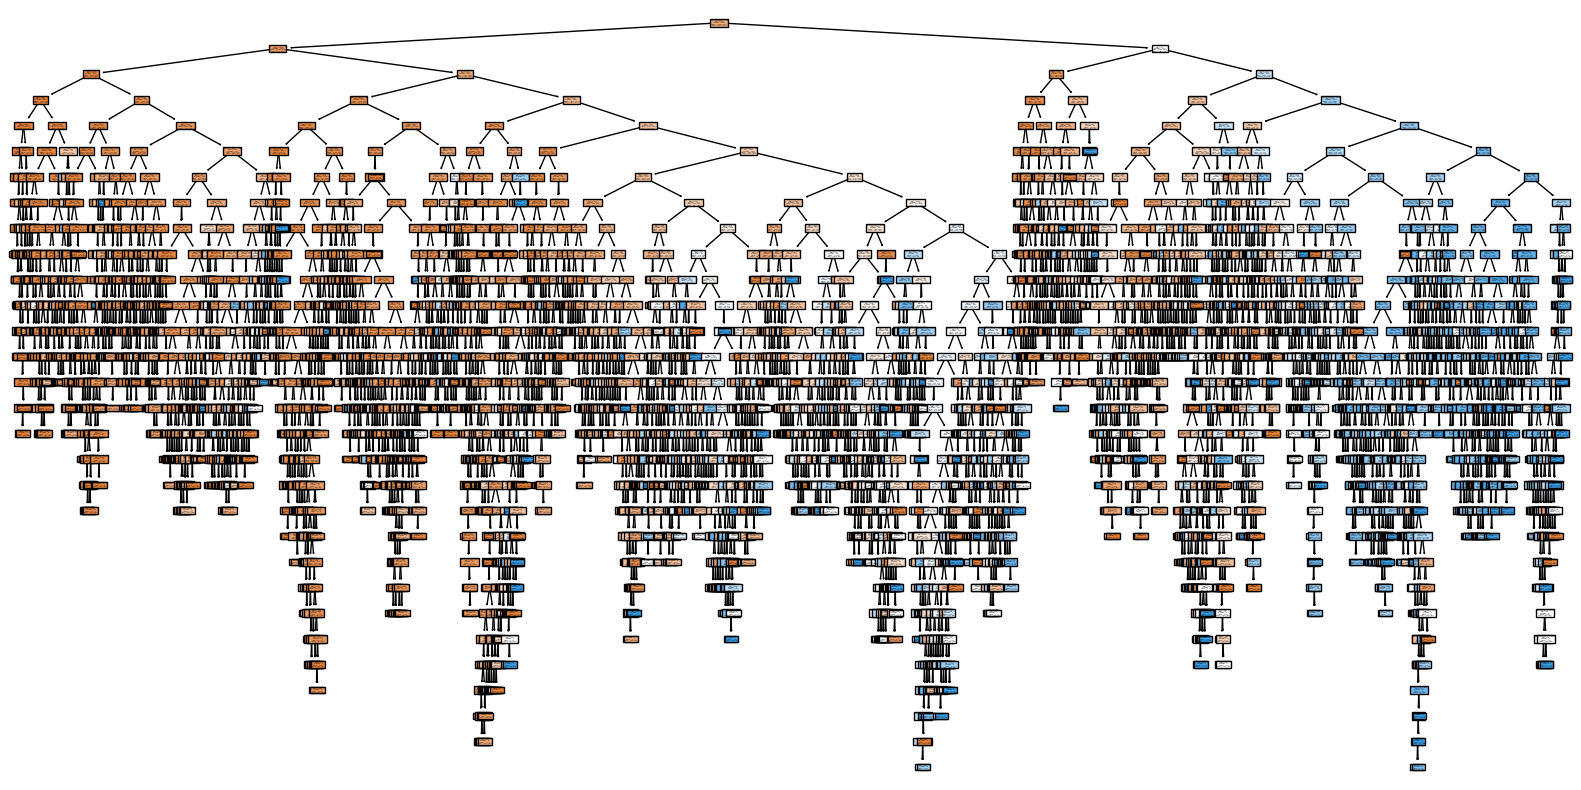

In [11]:
# Plot the Decision Tree
tree.plot_tree(clf, filled=True, feature_names=features, class_names=['30k or less', 'Over 30k'])
plt.show()

In [13]:
# Get accuracy of Decision Tree on development set
y_pred_dev = clf.predict(X_dev)
accuracy = accuracy_score(y_dev, y_pred_dev)
accuracy

0.7678685726477491

In [14]:
# Prepare lists to store accuracies
train_accuracies = []
dev_accuracies = []

To enhance our visualisation, we will set up 9 subplots for the 9 Decision Trees we will plot for each max_depth value.

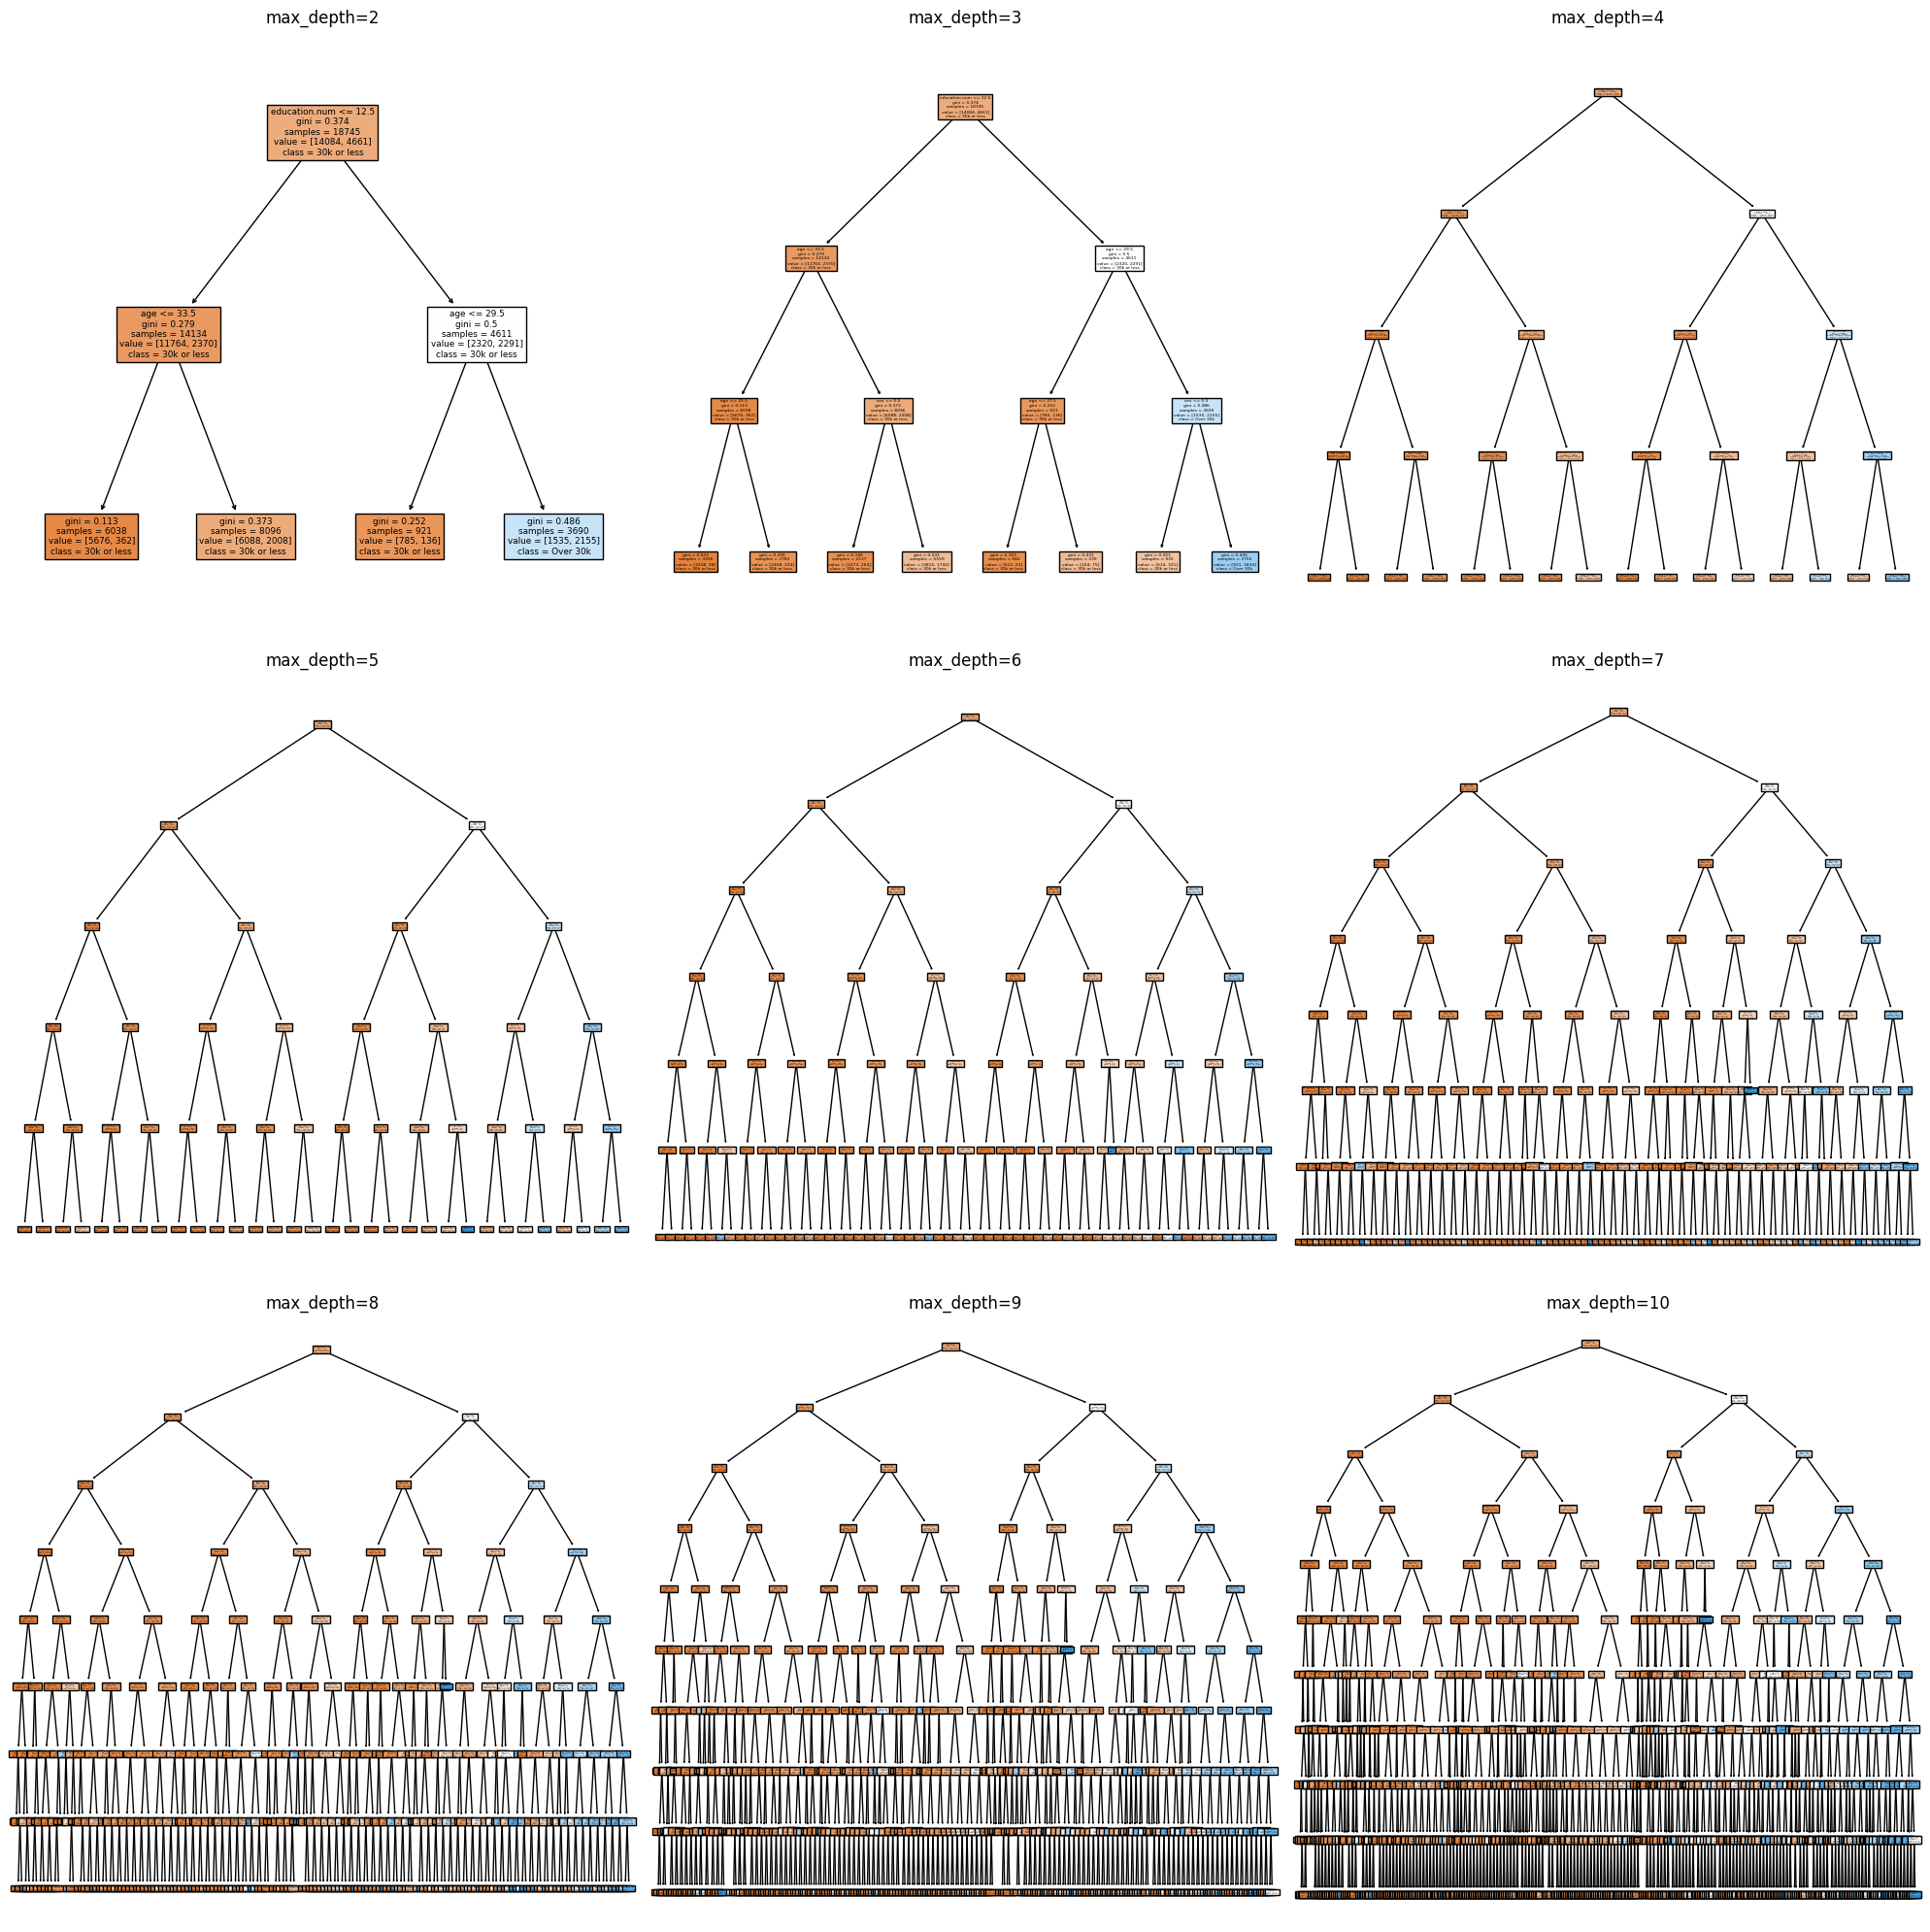

In [15]:
# Set up subplots for Decision Trees
fig, axes = plt.subplots(3, 3, figsize=(20, 20)) # 3 rows + 3 columns = 9 subplots
axes = axes.flatten() # for easy iteration

# Loop over different values of max_depth
for i, max_depth in enumerate(range(2, 11)): # use enumerate to keep track of index positions of max_depth values for subplots

    # Train the Decision Tree model with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)

    # Predict on training and development sets
    y_train_pred = clf.predict(X_train)
    y_dev_pred = clf.predict(X_dev)

    # Compute accuracies for both
    train_accuracy = accuracy_score(y_train, y_train_pred)
    dev_accuracy = accuracy_score(y_dev, y_dev_pred)

    # Store accuracies
    train_accuracies.append(train_accuracy)
    dev_accuracies.append(dev_accuracy)

    # Plot the Decision Tree
    tree.plot_tree(clf, filled=True, feature_names=features, class_names=['30k or less', 'Over 30k'], ax=axes[i])
    axes[i].set_title(f"max_depth={max_depth}")

  # Adjust layout
plt.tight_layout()
plt.show()

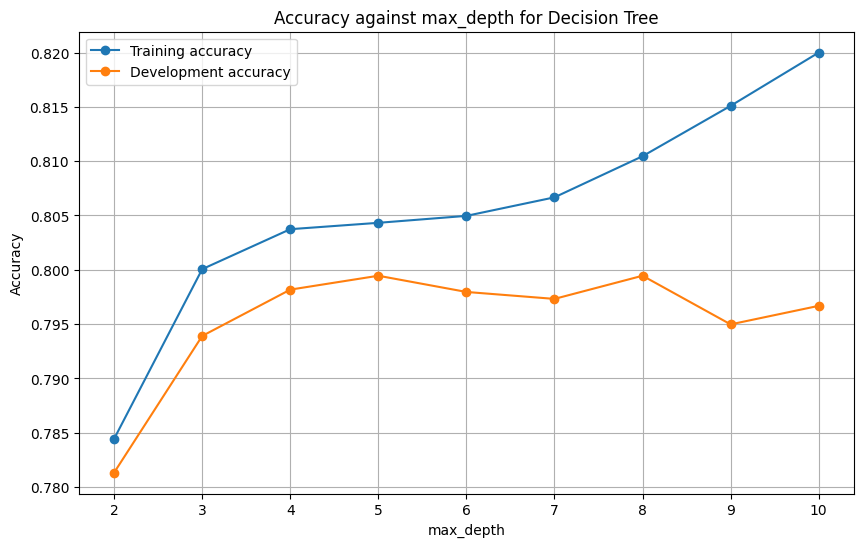

In [18]:
# Plot accuracies vs. max_depth
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), train_accuracies, marker='o', label='Training accuracy')
plt.plot(range(2, 11), dev_accuracies, marker='o', label='Development accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy against max_depth for Decision Tree')
plt.legend() # important for when you have more than two lines in the same plot
plt.grid(True) # good to have grid lines for plots like this

We see that for increased max_depth values, the training accuracy increases. Whereas for increased max_depth values, the development accuracy starts to decrease. This shows that our model starts to overfit for max_depth values greater than 5 since model performance is generally poorer on unseen data (the development set) after this point.

In [32]:
# Accuracy of final model with optimal max_depth
clf_final = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_final.fit(X_train, y_train)

y_test_pred = clf_final.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy

0.8117426181942311